# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [77]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

## Part1: Linear Regression

E_train is 0.00030026712821578787, E_test is 0.0004901625190921807


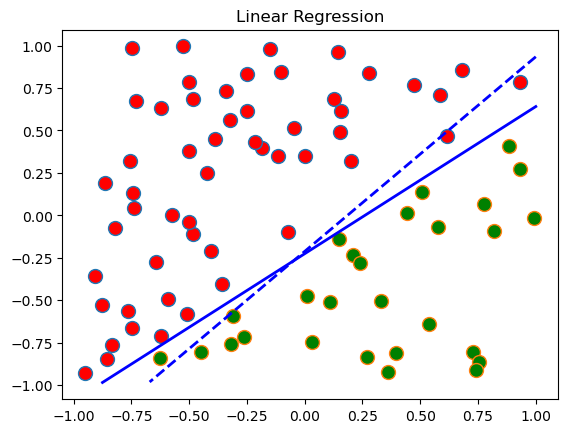

In [106]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data

E_train = 0
E_test = 0 

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)

    # divide the data into two parts
    X_train = X[:,:80]
    y_train = y[:,:80]

    X_test = X[:,80:]
    y_test = y[:,80:]

    w_g = linear_regression(X_train, y_train)
    #TODO
    # Compute training, testing error

    X_train_bias = np.vstack([np.ones((1,X_train.shape[1])) , X_train])
    y_train_pred = w_g.T @ X_train_bias
    mse_train = np.mean((y_train - y_train_pred) ** 2)
    E_train += mse_train

    X_test_bias = np.vstack([np.ones((1,X_test.shape[1])) , X_test])
    y_test_pred = w_g.T @ X_test_bias
    mse_test = np.mean((y_test - y_test_pred) ** 2)
    E_test += mse_test

    E_train = E_train / nRep
    E_test = E_test / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X_train, y_train, w_f, w_g, 'Linear Regression');


## Part2: Linear Regression: noisy

E_train is 0.5242491018003249, E_test is 0.5643704137819391


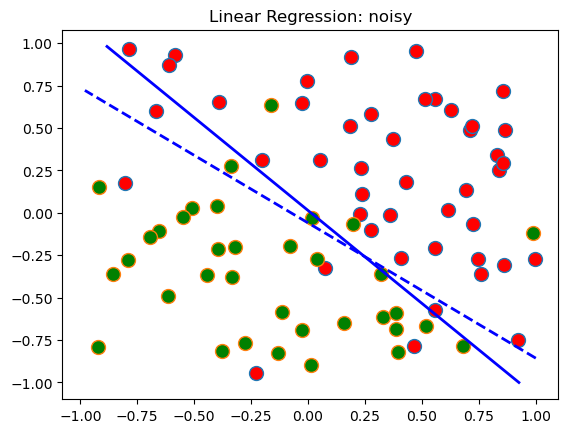

In [107]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

E_train = 0
E_test = 0 

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    
    # divide the data into two parts
    X_train = X[:,:80]
    y_train = y[:,:80]

    X_test = X[:,80:]
    y_test = y[:,80:]

    w_g = linear_regression(X_train, y_train)

    #TODO
    # Compute training, testing error

    X_train_bias = np.vstack([np.ones((1,X_train.shape[1])) , X_train])
    y_train_pred = w_g.T @ X_train_bias
    mse_train = np.mean((y_train - y_train_pred) ** 2)
    E_train += mse_train

    X_test_bias = np.vstack([np.ones((1,X_test.shape[1])) , X_test])
    y_test_pred = w_g.T @ X_test_bias
    mse_test = np.mean((y_test - y_test_pred) ** 2)
    E_test += mse_test

E_train = E_train / nRep
E_test = E_test / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X_train, y_train, w_f, w_g, 'Linear Regression: noisy');

## Part3: Linear Regression: poly_fit

In [91]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
#TODO
# Compute training, testing error

P,N = X.shape
X_bias = np.vstack([np.ones((1,N)), X])
y_pre = w.T @ X_bias
E_train = np.mean((y - y_pre) ** 2)

P_test , N_test = X_test.shape
X_test_bias = np.vstack([np.ones((1,N_test)) , X_test])
y_test_pred = w.T @ X_test_bias
E_test = np.mean((y_test - y_test_pred) ** 2)

print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform

order = 2 
X_t = np.vstack([X**i for i in range(1,order+1)])
X_test_t = np.vstack([X_test**i for i in range(1,order+1)])

w = linear_regression(X_t, y)

# Compute training, testing error

X_t_bias = np.vstack([np.ones((1,N)), X_t])
y_t_pre = w.T @ X_t_bias
E_train = np.mean((y - y_t_pre) ** 2)

X_test_t_bias = np.vstack([np.ones((1,N_test)) , X_test_t])
y_test_t_pred = w.T @ X_test_t_bias
E_test = np.mean((y_test - y_test_t_pred) ** 2)


print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.9784045613544557, E_test is 1.0256475569026184
E_train is 0.3773530029317472, E_test is 0.3885960064079985


## Part4: Logistic Regression

E_train is 0.090375, E_test is 0.09650000000000002


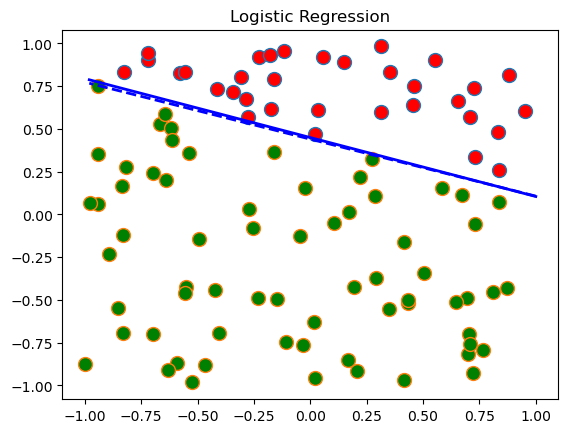

In [112]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data

E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)

    # divide the data into two parts
    X_train = X[:,:80]
    y_train = y[:,:80]

    X_test = X[:,80:]
    y_test = y[:,80:]
    
    y_adjust = (y_train + 1) / 2
    w_g = logistic(X_train, y_adjust)
    #TODO
    # Compute training, testing error

    P , N = X_train.shape
    X_bias = np.vstack([np.ones((1,X_train.shape[1])) , X_train])
    z = w_g.T @ X_bias
    y_pre_prod = 1 / (1 + np.exp(-z))
    y_pre = (y_pre_prod >= 0.5).astype(int) *2 - 1
    err = np.mean(y_pre != y_train)
    E_train += err

    X_test_bias = np.vstack([np.ones((1,X_test.shape[1])), X_test])
    z_test = w_g.T @ X_test_bias
    y_test_pre_prod = 1 / (1 + np.exp(-z_test))
    y_test_pre = (y_test_pre_prod >= 0.5).astype(int) *2 -1
    err_test = np.mean(y_test_pre != y_test)
    E_test += err_test 

E_train = E_train / nRep
E_test = E_test / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part5: Logistic Regression: noisy

E_train is 0.16150000000000003, E_test is 0.16749999999999995


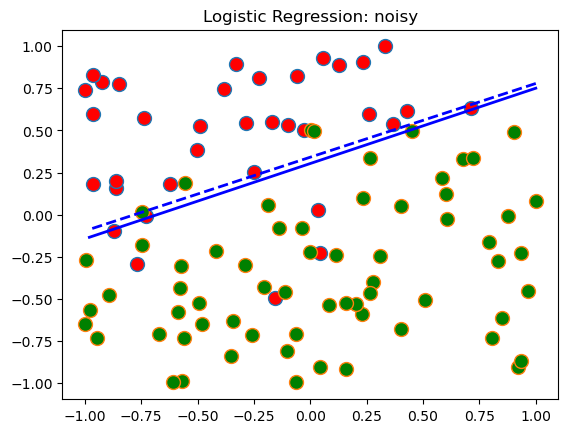

In [ ]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data

E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain,'noisy')

    # divide the data into two parts
    X_train = X[:,:80]
    y_train = y[:,:80]

    X_test = X[:,80:]
    y_test = y[:,80:]
    
    y_adjust = (y_train + 1) / 2
    w_g = logistic(X_train, y_adjust)
    #TODO
    # Compute training, testing error

    P , N = X_train.shape
    X_bias = np.vstack([np.ones((1,X_train.shape[1])) , X_train])
    z = w_g.T @ X_bias
    y_pre_prod = 1 / (1 + np.exp(-z))
    y_pre = (y_pre_prod >= 0.5).astype(int) *2 - 1
    err = np.mean(y_pre != y_train)
    E_train += err

    X_test_bias = np.vstack([np.ones((1,X_test.shape[1])), X_test])
    z_test = w_g.T @ X_test_bias
    y_test_pre_prod = 1 / (1 + np.exp(-z_test))
    y_test_pre = (y_test_pre_prod >= 0.5).astype(int) *2 -1
    err_test = np.mean(y_test_pre != y_test)
    E_test += err_test 

E_train = E_train / nRep
E_test = E_test / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part6: SVM

E_train is 0.0, E_test is 0.013000000000000029
Average number of support vectors is 3.075.


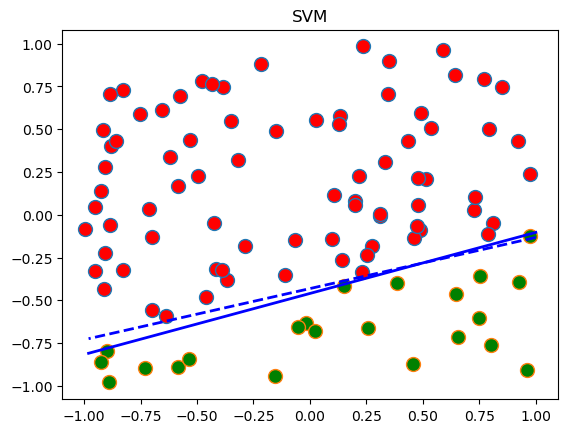

In [ ]:
from svm import svm

nRep = 1000; # number of replica tes
nTrain = 100; # number of training data

E_train = 0
E_test = 0
avgNum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)

    # divide the data into two parts
    X_train = X[:,:80]
    y_train = y[:,:80]

    X_test = X[:,80:]
    y_test = y[:,80:]
    w_g, num_sc = svm(X_train, y_train)

    #TODO
    # Compute training, testing error
    # Sum up number of support vectors


    X_bias = np.vstack([np.ones((1,X_train.shape[1])) , X_train])
    z = w_g.T @ X_bias
    y_pre = np.sign(z)
    
    err = np.mean(y_pre != y_train)
    E_train += err

    X_test_bias = np.vstack([np.ones((1,X_test.shape[1])), X_test])
    z_test = w_g.T @ X_test_bias
    y_test_pre = np.sign(z_test)
    err_test = np.mean(y_test_pre != y_test)
    E_test += err_test

    avgNum += num_sc

E_train = E_train / nRep
E_test = E_test / nRep
avgNum = avgNum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')